# The Golden Gloves
## Topic - Using historical data to predict MLB Hall of Fame status.
#### Data Source - https://www.seanlahman.com/baseball-archive/statistics/  
#### Group Hypothesis - Stats affect 
#### Approach to use for analysis - Aggregate stats for each player in regard to batting, fielding, and pitching. Using this data we can attempt to predict hall of fame status using a classificication machine learning method.

In [71]:
# Importing necessary packages
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Pandas setup
pd.set_option('display.max_columns', None)

# Hall of Fame Data
Providing example of how two tables could be combined to create a more readble hall of fame table.

In [72]:
# Importing data
hall_of_fame_df = pd.read_csv("Resources/baseballdatabank-master/core/HallOfFame.csv")
hall_of_fame_df.head()

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


# Career Batting Data
Providing a general exmaple of how batting data could be used.

In [73]:
# Importing data
batting_df = pd.read_csv("Resources/baseballdatabank-master/core/batting.csv")
batting_df.drop(columns=['yearID', 'teamID', 'IBB', 'HBP', 'SH', 'SF', 'stint', 'lgID'], inplace=True)
batting_df.head()

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,GIDP
0,abercda01,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0
1,addybo01,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,0.0
2,allisar01,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,1.0
3,allisdo01,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,0.0
4,ansonca01,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,0.0


In [74]:
# Grouping by playerID and yearID, then sorting by home runs by season
career_batting_df = batting_df.groupby(['playerID']).sum()

In [75]:
# Adding batting prefix to every column to ensure there aren't conflicts when combined with fielding and pitching
career_batting_df = career_batting_df.add_prefix('b_')

# Career Fielding Data

In [76]:
# Importing data
fielding_df = pd.read_csv("Resources/baseballdatabank-master/core/Fielding.csv")

# Dropping inconsistent columns
fielding_df.drop(['lgID', 'PB', 'WP', 'SB', 'CS', 'ZR'], axis=1, inplace=True)

# Dropping unnecessary columns
fielding_df.drop(['yearID', 'stint', 'teamID', 'POS'], axis=1, inplace=True)

# Grouping by playerID to get career stats
career_fielding_df = fielding_df.groupby(['playerID']).sum()

# Adding batting prefix to every column to ensure there aren't conflicts when combined with batting and pitching
career_fielding_df = career_fielding_df.add_prefix('f_')
career_fielding_df.head()


,f_G,f_GS,f_InnOuts,f_PO,f_A,f_E,f_DP
playerID,,,,,,,
aardsda01,331,0.0,1011.0,11,29,3.0,2
aaronha01,3020,2977.0,78414.0,7436,429,144.0,218
aaronto01,387,206.0,6472.0,1317,113,22.0,124
aasedo01,448,91.0,3328.0,67,135,13.0,10
abadan01,9,4.0,138.0,37,1,1.0,3


# Career Pitching Data

In [77]:
# Importing data
pitching_df = pd.read_csv("Resources/baseballdatabank-master/core/Pitching.csv")

# Dropping inconsistent columns
pitching_df.drop(['lgID', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'BAOpp'], axis=1, inplace=True)

# Dropping unnecessary columns
pitching_df.drop(['yearID', 'stint', 'teamID'], axis=1, inplace=True)

# Grouping by playerID to get career stats
career_pitching_df = pitching_df.groupby(['playerID']).sum()

# Adding batting prefix to every column to ensure there aren't conflicts when combined with batting and pitching
career_pitching_df = career_pitching_df.add_prefix('p_')

career_pitching_df.head()

,p_W,p_L,p_G,p_GS,p_CG,p_SHO,p_SV,p_IPouts,p_H,p_ER,p_HR,p_BB,p_SO,p_ERA,p_WP,p_BK,p_BFP,p_GF,p_R
playerID,,,,,,,,,,,,,,,,,,,
aardsda01,16,18,331,0,0,0,69,1011,296,160,41,183,340,46.75,12,1,1475.0,141,169
aasedo01,66,60,448,91,22,5,82,3328,1085,468,89,457,641,45.41,22,3,4730.0,235,503
abadfe01,8,29,384,6,0,0,2,992,309,135,42,116,280,40.81,10,2,1399.0,97,143
abbeybe01,22,40,79,65,52,0,1,1704,686,285,18,192,161,28.07,18,0,2568.0,14,442
abbeych01,0,0,1,0,0,0,0,6,6,1,0,0,0,4.50,1,0,12.0,1,3


# Exporting Custom Datasets to CSV files

In [78]:
# Exporting career batting dataframe to csv
career_batting_df.to_csv('Resources/custom-tables/career-batting.csv')

# Exporting career fielding dataframe to csv
career_fielding_df.to_csv('Resources/custom-tables/career-fielding.csv')

# Exporting career pitching dataframe to csv
career_pitching_df.to_csv('Resources/custom-tables/career-pitching.csv')

# RFC Career Batting Data

In [79]:
batting_ml_df = pd.merge(hall_of_fame_df, career_batting_df, left_on='playerID', right_on='playerID')
batting_ml_df = batting_ml_df[batting_ml_df['category'] == 'Player']
batting_ml_df.drop(['playerID','yearID', 'votedBy', 'ballots', 'needed', 'votes', 'category', 'needed_note'], axis=1, inplace=True)
batting_ml_df.head()

,inducted,b_G,b_AB,b_R,b_H,b_2B,b_3B,b_HR,b_RBI,b_SB,b_CS,b_BB,b_SO,b_GIDP
0,Y,3035,11436,2247,4189,724,295,117,1944.0,896.0,178.0,1249,608.0,0.0
1,Y,2503,8398,2174,2873,506,136,714,2217.0,123.0,117.0,2062,1330.0,2.0
2,Y,2794,10439,1739,3420,643,252,101,1733.0,723.0,15.0,963,735.0,0.0
3,N,2794,10439,1739,3420,643,252,101,1733.0,723.0,15.0,963,735.0,0.0
4,Y,647,1687,151,362,50,12,7,165.0,20.0,1.0,116,218.0,0.0


In [80]:
# Defining oversampling method
smote = SMOTE(sampling_strategy='not majority')

# Defining learning method
rfc = RandomForestClassifier(
    max_depth=25,
    n_estimators = 5000,
    random_state=0)

# Define the learning pipeline
clf = Pipeline(steps=[('sampling', smote), ('classifier', rfc)])

# assigning data
y = batting_ml_df[['inducted']].values
X = batting_ml_df.drop(['inducted'], axis=1)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)

Pipeline(steps=[('sampling', SMOTE(sampling_strategy='not majority')),
                ('classifier',
                 RandomForestClassifier(max_depth=25, n_estimators=5000,
                                        random_state=0))])

In [81]:
# Getting accuracy of model
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9492574257425742


In [82]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix

predictions = clf.predict(X_test)

cm = confusion_matrix(y_test, predictions)
cm

array([[755,   8],
       [ 33,  12]], dtype=int64)

# Visiualizing the Batting Prediction Model

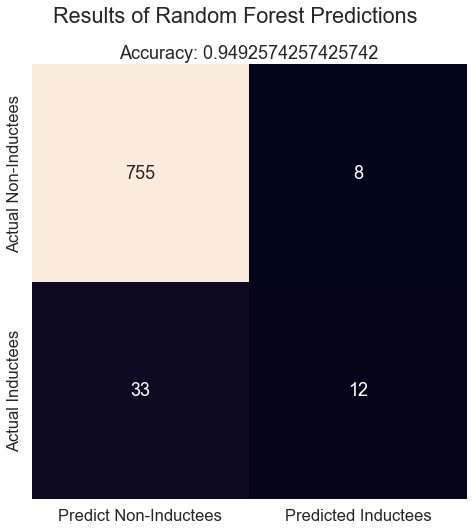

In [83]:
# Increasing plot size
sns.set(rc = {'figure.figsize': (15,8)})

# Increasing default text size
sns.set(font_scale=1.5)

# Creating heatmap
sns.heatmap(
    cm,             # data given to map
    annot=True,     # annotating numbers to squares
    square=True,    # making all sectors equal squares
    xticklabels=['Predict Non-Inductees', 'Predicted Inductees'],
    yticklabels=['Actual Non-Inductees', 'Actual Inductees'],
    cbar=False,     # disabling color bar
    fmt='g'         # forcing standard number notation
)

# Adding title to plot
plt.suptitle('Results of Random Forest Predictions')
plt.title(f'Accuracy: {accuracy}')

# Displaying plot
plt.show()

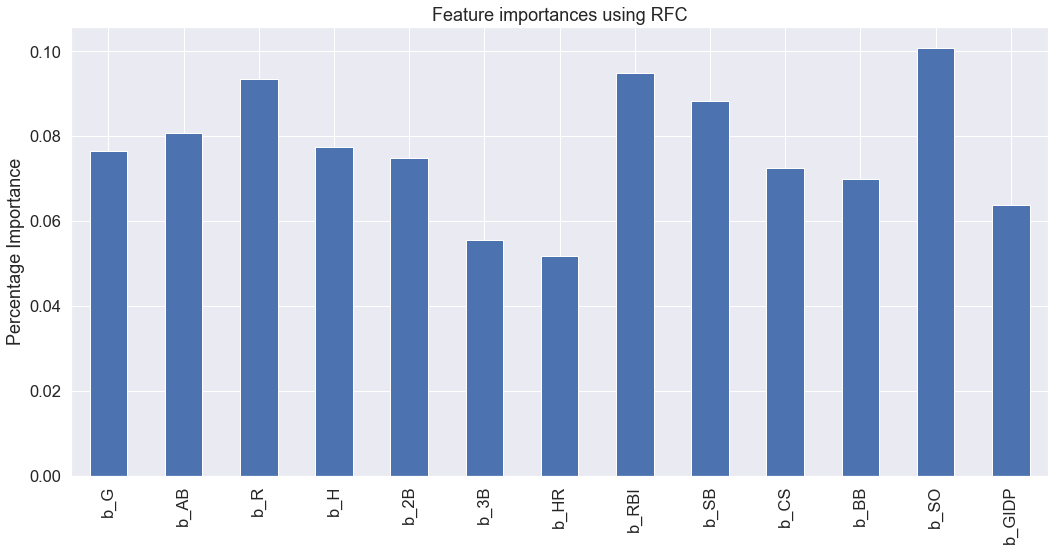

In [84]:
# Displaying feature importances
importances = clf[1].feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using RFC")
ax.set_ylabel("Percentage Importance")
fig.tight_layout()

# RFC of Career Pitching Stats

In [85]:
pitching_ml_df = pd.merge(hall_of_fame_df, career_pitching_df, left_on='playerID', right_on='playerID')
pitching_ml_df = pitching_ml_df[pitching_ml_df['category'] == 'Player']
pitching_ml_df.drop(['playerID','yearID', 'votedBy', 'ballots', 'needed', 'votes', 'category', 'needed_note'], axis=1, inplace=True)
pitching_ml_df.head()

,inducted,p_W,p_L,p_G,p_GS,p_CG,p_SHO,p_SV,p_IPouts,p_H,p_ER,p_HR,p_BB,p_SO,p_ERA,p_WP,p_BK,p_BFP,p_GF,p_R
0,Y,0,0,3,0,0,0,1,15,6,2,0,2,0,4.50,0,0,20.0,2,2
1,Y,94,46,163,148,107,17,4,3664,974,309,10,441,488,36.80,25,4,5006.0,11,398
2,Y,0,0,2,0,0,0,0,25,7,0,0,6,6,0.00,3,0,37.0,2,5
3,N,0,0,2,0,0,0,0,25,7,0,0,6,6,0.00,3,0,37.0,2,5
4,Y,373,188,636,552,435,79,29,14366,4219,1135,90,848,2507,47.69,115,8,18943.0,73,1620


In [86]:
# Defining oversampling method
smote = SMOTE(sampling_strategy='not majority')

# Defining learning method
rfc = RandomForestClassifier(
    max_depth=25,
    n_estimators = 5000,
    random_state=0)

# Define the learning pipeline
clf = Pipeline(steps=[('sampling', smote), ('classifier', rfc)])

# assigning data
y = pitching_ml_df[['inducted']].values
X = pitching_ml_df.drop(['inducted'], axis=1)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)

Pipeline(steps=[('sampling', SMOTE(sampling_strategy='not majority')),
                ('classifier',
                 RandomForestClassifier(max_depth=25, n_estimators=5000,
                                        random_state=0))])

In [87]:
# Getting accuracy of model
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.921875


In [88]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix

predictions = clf.predict(X_test)

cm = confusion_matrix(y_test, predictions)
cm

array([[288,  11],
       [ 14,   7]], dtype=int64)

# Visiualizing Pitching Prediction Model

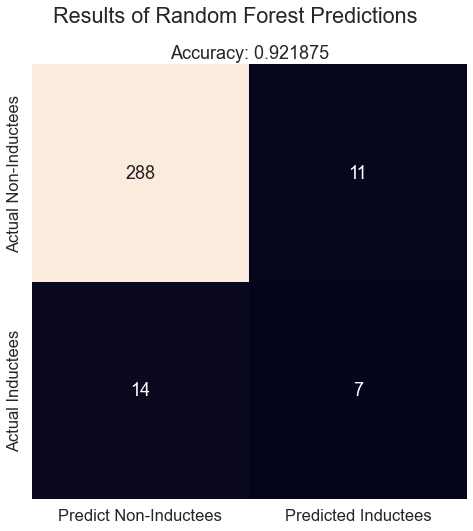

In [89]:
# Increasing plot size
sns.set(rc = {'figure.figsize': (15,8)})

# Increasing default text size
sns.set(font_scale=1.5)

# Creating heatmap
sns.heatmap(
    cm,             # data given to map
    annot=True,     # annotating numbers to squares
    square=True,    # making all sectors equal squares
    xticklabels=['Predict Non-Inductees', 'Predicted Inductees'],
    yticklabels=['Actual Non-Inductees', 'Actual Inductees'],
    cbar=False,     # disabling color bar
    fmt='g'         # forcing standard number notation
)

# Adding title to plot
plt.suptitle('Results of Random Forest Predictions')
plt.title(f'Accuracy: {accuracy}')

# Displaying plot
plt.show()

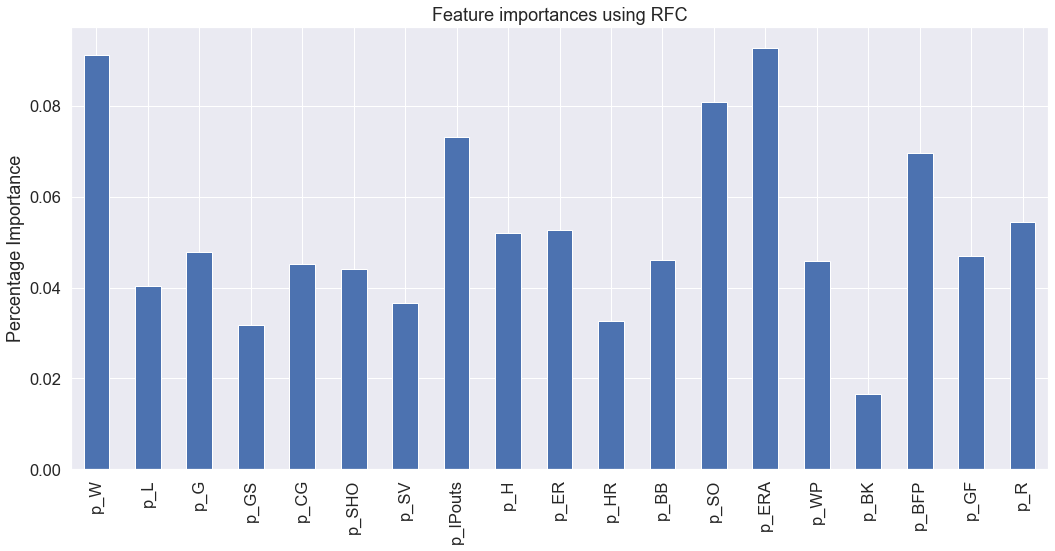

In [90]:
# Displaying feature importances
importances = clf[1].feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using RFC")
ax.set_ylabel("Percentage Importance")
fig.tight_layout()

# RFC of Career Fielding Data

In [91]:
fielding_ml_df = pd.merge(hall_of_fame_df, career_fielding_df, left_on='playerID', right_on='playerID')
fielding_ml_df = fielding_ml_df[fielding_ml_df['category'] == 'Player']
fielding_ml_df.drop(['playerID','yearID', 'votedBy', 'ballots', 'needed', 'votes', 'category', 'needed_note'], axis=1, inplace=True)
fielding_ml_df.head()

,inducted,f_G,f_GS,f_InnOuts,f_PO,f_A,f_E,f_DP
0,Y,2954,725.0,19266.0,6507,410,278.0,113
1,Y,2436,0.0,0.0,4787,569,179.0,86
2,Y,2777,997.0,50064.0,7940,6782,828.0,963
3,N,2777,997.0,50064.0,7940,6782,828.0,963
4,Y,643,266.0,10032.0,313,1506,57.0,44


In [92]:
# Defining oversampling method
smote = SMOTE(sampling_strategy='not majority')

# Defining learning method
rfc = RandomForestClassifier(
    max_depth=25,
    n_estimators = 5000,
    random_state=0)

# Define the learning pipeline
clf = Pipeline(steps=[('sampling', smote), ('classifier', rfc)])

# assigning data
y = fielding_ml_df[['inducted']].values
X = fielding_ml_df.drop(['inducted'], axis=1)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)

Pipeline(steps=[('sampling', SMOTE(sampling_strategy='not majority')),
                ('classifier',
                 RandomForestClassifier(max_depth=25, n_estimators=5000,
                                        random_state=0))])

In [93]:
# Getting accuracy of model
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9282178217821783


In [94]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix

predictions = clf.predict(X_test)

cm = confusion_matrix(y_test, predictions)
cm

array([[743,  20],
       [ 38,   7]], dtype=int64)

# Visiualzing Fielding Prediction Model

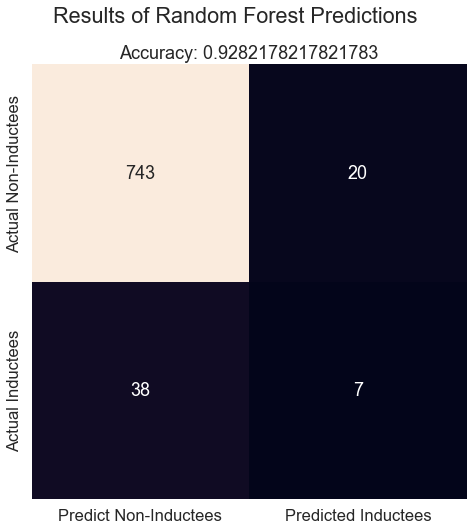

In [95]:
# Increasing plot size
sns.set(rc = {'figure.figsize': (15,8)})

# Increasing default text size
sns.set(font_scale=1.5)

# Creating heatmap
sns.heatmap(
    cm,             # data given to map
    annot=True,     # annotating numbers to squares
    square=True,    # making all sectors equal squares
    xticklabels=['Predict Non-Inductees', 'Predicted Inductees'],
    yticklabels=['Actual Non-Inductees', 'Actual Inductees'],
    cbar=False,     # disabling color bar
    fmt='g'         # forcing standard number notation
)

# Adding title to plot
plt.suptitle('Results of Random Forest Predictions')
plt.title(f'Accuracy: {accuracy}')

# Displaying plot
plt.show()

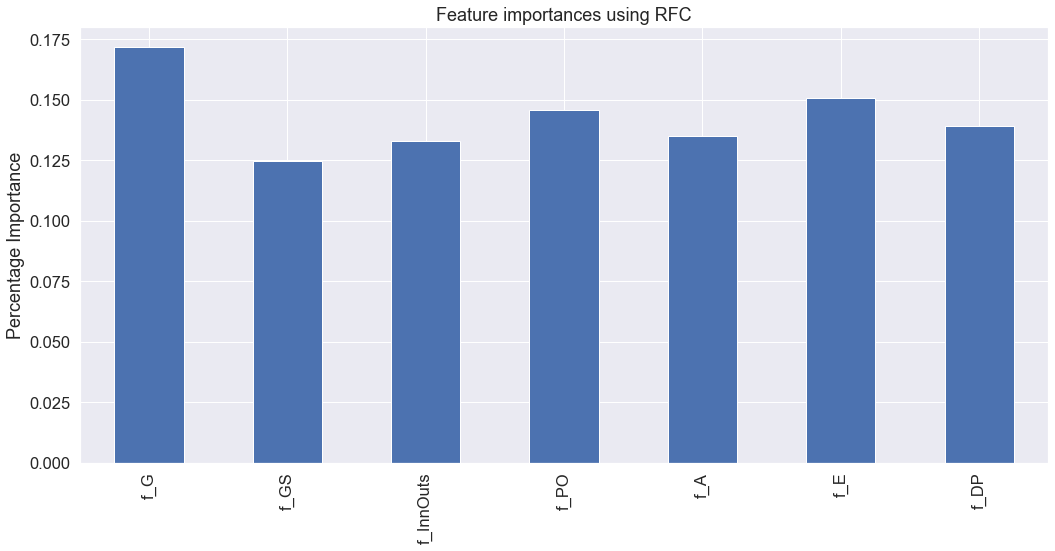

In [96]:
# Displaying feature importances
importances = clf[1].feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using RFC")
ax.set_ylabel("Percentage Importance")
fig.tight_layout()